### Giacomo Zema
### s269614
### Homework 1

#### Problem 3 Section b

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

##### Drawing the graph

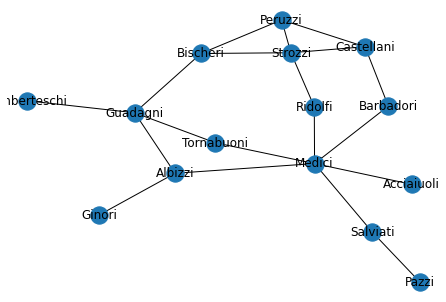

In [5]:
G=nx.Graph()

nodes = ['Acciaiuoli', 'Albizzi', 'Barbadori',
        'Bischeri', 'Castellani', 'Ginori', 
         'Guadagni', 'Lamberteschi', 'Medici', 
         'Pazzi', 'Peruzzi', 'Ridolfi',
         'Salviati', 'Strozzi', 'Tornabuoni']

for node in nodes:
    G.add_node(node)

    
edges=[("Acciaiuoli","Medici"),
       ("Albizzi","Ginori"),
       ("Albizzi","Guadagni"),
       ("Albizzi","Medici"),
       ("Barbadori","Castellani"),
       ("Barbadori","Medici"),
       ("Bischeri","Guadagni"),
       ("Bischeri","Peruzzi"),
       ("Bischeri","Strozzi"),
       ("Castellani","Peruzzi"),
       ("Castellani","Strozzi"),
       ("Guadagni","Tornabuoni"),
       ("Guadagni","Lamberteschi"),
       ("Medici", "Ridolfi"),
       ("Medici", "Salviati"),
       ("Medici", "Tornabuoni"),
       ("Pazzi", "Salviati"),
       ("Peruzzi","Strozzi"),
       ("Ridolfi","Strozzi")]

for edge in edges:
    G.add_edge(*edge)


n_nodes=len(G.nodes)

nx.draw(G, with_labels=True)

##### Construct a dictionary that maps the label of nodes 

In [11]:
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i
print(indices)

{'Acciaiuoli': 0, 'Albizzi': 1, 'Barbadori': 2, 'Bischeri': 3, 'Castellani': 4, 'Ginori': 5, 'Guadagni': 6, 'Lamberteschi': 7, 'Medici': 8, 'Pazzi': 9, 'Peruzzi': 10, 'Ridolfi': 11, 'Salviati': 12, 'Strozzi': 13, 'Tornabuoni': 14}


##### Compute the evolution of the states of the nodes

In [26]:
# Number of iterations
n_iter = 100;
    
# Stubborn and regular nodes
stubborn = ["Medici", "Strozzi"];
stubborn_id = [indices.get(key) for key in stubborn]
regular = [node for node in G.nodes if node not in stubborn]
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
print("Stubborn nodes:", stubborn)
print()
print("Regular nodes:", regular)

# Input to stubborn nodes
u = [1,-1]

# P matrix
W = nx.adjacency_matrix(G) 
W = W.toarray() # convert W to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Submatrices
Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stubborn_id)]

# Sample a random initial condition for regular nodes
ic = np.random.uniform(0,1,len(regular))

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print()
print("Initial condition:", x[:,0])

# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

x_final = x[:,n_iter-1]

print()
print()

for key in indices.keys():
    print(key ,": %.6f"%(x_final[indices[key]]))

Stubborn nodes: ['Medici', 'Strozzi']

Regular nodes: ['Acciaiuoli', 'Albizzi', 'Barbadori', 'Bischeri', 'Castellani', 'Ginori', 'Guadagni', 'Lamberteschi', 'Pazzi', 'Peruzzi', 'Ridolfi', 'Salviati', 'Tornabuoni']

Initial condition: [ 0.9185356   0.47329243  0.61444501  0.51839969  0.09377845  0.85195545
  0.26684985  0.33074221  1.          0.9761715   0.9261597   0.8533326
  0.64825568 -1.          0.51005043]


Acciaiuoli : 1.000000
Albizzi : 0.636364
Barbadori : 0.272727
Bischeri : -0.454545
Castellani : -0.454545
Ginori : 0.636364
Guadagni : 0.272727
Lamberteschi : 0.272727
Medici : 1.000000
Pazzi : 1.000000
Peruzzi : -0.636364
Ridolfi : 0.000000
Salviati : 1.000000
Strozzi : -1.000000
Tornabuoni : 0.636364


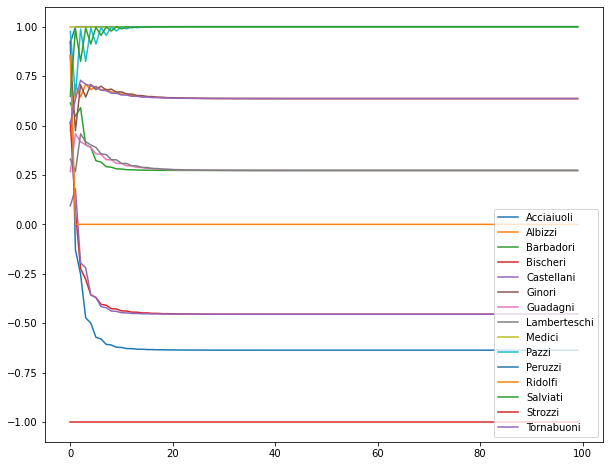

In [47]:
fig = plt.figure(1, figsize=(10,8))
ax = plt.subplot(111)

for node in nodes:
    trajectory = x[indices[node],:]
    ax.plot(trajectory, label=node)
    
ax.legend(loc='lower right')
plt.show()

#### Problem 3 Section d

##### Write down a Matlab or Pythoncode for the iterative distributed computation of the PageRank centrality in the network with β = 0.15 and uniform input

Page-Rank Centrality

$ z=(1-\beta) P' z + \beta \mu $

$P' z$ is the invariant distribution centrality

$\mu$ is the intrinsic centrality, in this case uniform

The Page-Rank centrality is a convex combination of the two

We treat this computation as a flow dynamics with exogenous input

In [51]:
#we choose a uniform mu, beta=0.15, the initial conditions are also uniform
#we keep the information about G from 3.b
mu = np.ones(n_nodes)/n_nodes
beta = 0.15
z_zero = np.ones(n_nodes)/n_nodes
z_old = z_zero

#we need to choose a tolerance so that when |z_new-z_old| is in the tolerance range we can stop iterating
tolerance = 1e-6

#iterate until convergence
while True:
    z_new = (1-beta)*P.T@z_old + beta*mu
    if np.linalg.norm(z_new-z_old)<tolerance:
        break
    z_old=z_new

#print the results 

for node, value in zip(nodes, z_new):
    print(node, ": %.6f"%(value))
    

Acciaiuoli : 0.031824
Albizzi : 0.082126
Barbadori : 0.052127
Bischeri : 0.071527
Castellani : 0.071658
Ginori : 0.033269
Guadagni : 0.103641
Lamberteschi : 0.032024
Medici : 0.154052
Pazzi : 0.036830
Peruzzi : 0.070187
Ridolfi : 0.051441
Salviati : 0.063129
Strozzi : 0.092318
Tornabuoni : 0.053847


#### Problem 4

We are asked to find the best placement for a second stubborn node so that the final states of the nodes maximize a given function:

$$H(s)= \frac{1}{n} \sum_{i \in V} x_i$$

The function $H$ is the final average opinion

##### Graph 1

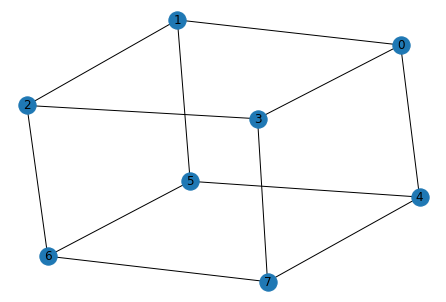

In [81]:
G1 = nx.Graph()

nodes1 = [0, 1, 2, 3, 4, 5, 6, 7]

edges1 = [(0, 1), (0, 3), (0, 4),
        (1, 2), (1, 5),
        (2, 3), (2, 6),
        (3, 7), (4, 5), (4, 7),
        (5, 6), (6, 7)]

G1.add_nodes_from(nodes1)
G1.add_edges_from(edges1)

n_nodes1 = len(nodes1)

nx.draw(G1, with_labels=True)

##### Graph 2

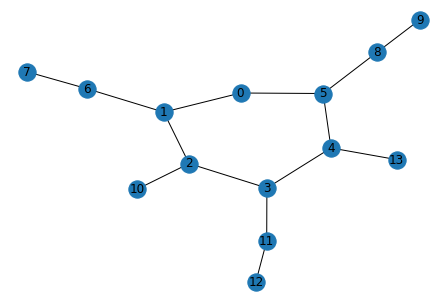

In [84]:
G2 = nx.Graph()

nodes2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

edges2= [(0,1),(1,2),(2,3),
        (3,4),(4,5),(5,0),
        (1,6),(6,7),(5,8),
        (8,9),(2,10),(3,11),
        (11,12),(4,13)]

G2.add_nodes_from(nodes2)
G2.add_edges_from(edges2)

n_nodes2 = len(nodes2)

nx.draw(G2, with_labels=True)

In order to find the best position for the new stubborn node, we compute the evolution of the opinions on the networks for every possible case and pick the one that maximizes the function

##### Graph 1

In [86]:
# Number of iterations
n_iter = 200;

final_opinions = dict()
average_opinion = dict() 

for node in G1.nodes:
    # Node 0 is the 0-stubborn node
    if node==0:
        continue
        
    # Stubborn and regular nodes
    stubborn = [0, node];
    regular = [node for node in G1.nodes if node not in stubborn]
    
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    A = nx.adjacency_matrix(G1) 
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A

    # Submatrices
    Q = P[np.ix_(regular, regular)]
    E = P[np.ix_(regular, stubborn)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes1, n_iter))
    x[stubborn,0] = u;
    x[regular,0] = ic;

    for t in range(1,n_iter):
        x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
        x[stubborn, t] = x[stubborn, t-1];

    final_opinions[node] = x[:,n_iter-1]
    average_opinion[node] = np.average(final_opinions[node])
    print("Average opinion:", average_opinion[node])

Stubborn nodes: [0, 1]
Average opinion: 0.4999999999999999
Stubborn nodes: [0, 2]
Average opinion: 0.5
Stubborn nodes: [0, 3]
Average opinion: 0.4999999999999999
Stubborn nodes: [0, 4]
Average opinion: 0.4999999999999999
Stubborn nodes: [0, 5]
Average opinion: 0.5
Stubborn nodes: [0, 6]
Average opinion: 0.4999999999999999
Stubborn nodes: [0, 7]
Average opinion: 0.4999999999999999


All the placements lead to the same outcome

##### Graph 2

In [94]:
# Number of iterations
n_iter = 200;

indices = dict()
for i in nodes2:
    indices[list(G2.nodes)[i]] = i


final_opinions = dict()
average_opinion = dict() 

for node in G2.nodes:
    # Node 0 is the 0-stubborn node
    if node==0:
        continue
        
    # Stubborn and regular nodes
    stubborn = [0, node];
    regular = [node for node in nodes2 if node not in stubborn]
    
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    A = nx.adjacency_matrix(G2) 
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A

    # Submatrices
    Q = P[np.ix_(regular, regular)]
    E = P[np.ix_(regular, stubborn)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes2,n_iter))
    x[stubborn,0] = u;
    x[regular,0] = ic;

    for t in range(1,n_iter):
        x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
        x[stubborn, t] = x[stubborn, t-1];

    final_opinions[node] = x[:,n_iter-1]
    average_opinion[node] = np.average(final_opinions[node])
    print("Average opinion:", "%.6f"%(average_opinion[node]))

Stubborn nodes: [0, 1]
Average opinion: 0.557143
Stubborn nodes: [0, 2]
Average opinion: 0.535714
Stubborn nodes: [0, 3]
Average opinion: 0.547619
Stubborn nodes: [0, 4]
Average opinion: 0.535714
Stubborn nodes: [0, 5]
Average opinion: 0.557143
Stubborn nodes: [0, 6]
Average opinion: 0.331170
Stubborn nodes: [0, 7]
Average opinion: 0.239499
Stubborn nodes: [0, 8]
Average opinion: 0.331170
Stubborn nodes: [0, 9]
Average opinion: 0.239497
Stubborn nodes: [0, 10]
Average opinion: 0.336735
Stubborn nodes: [0, 11]
Average opinion: 0.385714
Stubborn nodes: [0, 12]
Average opinion: 0.295918
Stubborn nodes: [0, 13]
Average opinion: 0.336735


The combinations that yield the maximum value of the function $H(S)$ are the one in which the stubborn node is node 1 and the one in which the stubborn node is node 5